# Decision Trees

Decision Trees are a very versatile and flexible Machine Learning algirhtm, they can perform classification, regression and even multioutput tasks. They are very well suited to fitting complex datasets. Decision Trees are the fundamental concept behind Random Forests, which are among the most powerful Machine Learning algorithms.

This chapter will be divided into the following sections: -
1. Training and Visualising a Decision Tree
2. Making Predictions
3. Estimating Class Probabilities
4. The CART Training Algorithm
5. Computational Complexity
6. Gini Impurity or Entropy?
7. Regularisation Hyperparameters
8. Regression
9. Instability


## 1. Training and Visualising a Decision Tree

Given below is an implementation of a DecisionTreeClassifier on the iris dataset.

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

You can visualise the trained DecisionTreeClassifier by using the plot_tree method given in sklearn, it makes use of matplotlib.

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

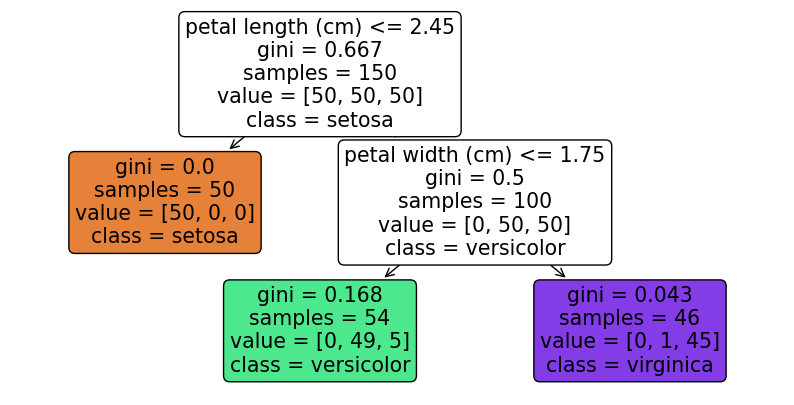

In [4]:
plt.figure(figsize=(10, 5))
plot_tree(tree_clf, feature_names= iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
plt.show();

## 2. Making Predictions

Now we will understand how the tree represented in the above plot makes its predictions. Lets take a case where you find an iris flower and you want to classify it. You will start at the root node (depth = 0, i.e. at the top): this node asks whether the flower petal length is smaller than 2.45 cm. If it is then you move down to the roots left child node (depth 1 left). In this case our node is  aleaf node, which means it does not have any child nodes, so it does not ask any further questions, it simply predicts the class, in our case the predicted class is iris setosa.

The second scenario is where the petal width is lesser than 1.75 cm, if this evaluates as true it will go 1 depth lower to its child node, this node is now a leaf node and does not ask any questions instead it classifies our instance. Which in this case is an iris versicolor. The third scenario is where the petal width is greater than 1.75 that is it evaluates as false, so it goes down 1 depth but to the right child not the left. This node is again a leaf node and hence does not ask any question instead it classifies our instance, in this case as an iris virginica.

**Note:** an important and great quality of Decision Trees, is that they require very little data preparation. In fact they dont require feature scaling and centering at all.

A nodes samples attribute counts how many training instances it applies to. For exampkle, 100 training instances have a petal length > 2.45 of which 54 have a petal width <= 1.75. A nodes value attribute tells you how many training instances of each class this node applies to for example, for the bottom right leaf node, our of the 46 samples it applies to 0 are from iris setosa, 1 is from iris versicolor and 45 are from iris virginica. (To know order of classes in the value array just check which element has the highest value in array and then element is the class it belongs to for example 45 is the highest value hence position 3 in arrray is class virginica, 49 is highest in left node at position 2 and that class is iris vergicolor.)

Finally a nodes gini attribute measures its impurity: a node is "pure" gini=0, if all its training instances it applies to belong to the same class. For example since depth-1 left node applies only to iris setosa classes (values are 0 for other classes), it is pure and the gini score is 0. The following equation shows how the training algorithm compute the gini score $G_i$ of the $i^{th}$ node. The depth-2 left node for example has a gini score equal to: $1 - (0/54)^2 -(49/54)^2 - (5/54)^2 \approx 0.168 $ to put it in english, it is equal to 1 - (values[0]/samples)^2 - (values[2]/samples)^2 ... - (values[n]/samples)^2

Gini Impurity Function:

$G_i = 1 - \sum \limits_{k=1}^{n}p_{i,k}^2$

In this equation:
* $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

Note: Sklearn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e. questions can only have yes/no answers). However other algorithms such as ID3 can produce DecisionTrees with nodes that have more than two children.

The below figure shows the DecisionTrees decision boundaries. The thick vertica line represents the decision boundary of the root node (depth 0): petal length = 2.45. Since the lefthand area is pure (only Iris septosa), it cannot be split any further. However the right hand area is impire so it splits it once again this time on the basis of petal width = 1.75. Since max depth was set to 2. The DecisionTree stops right there. If you set it to 3 then it would split it again this is indicated by the dotted lines

<center>
<br>
<img src="https://miro.medium.com/max/1178/1*EGumerhDU0rHB9Z85BYdig.png" height="300">
<br>
</center>

**Model Interpretation: White Box vs Black Box :-**
Decision Trees are intuitive and their decisions are easy to interpret. Such models are called white box models. In contrast, Random Forests or neural networks are black box movelds. They make great decisions and you can easily check the calculations that they perform to arrive to the conclusion, but their decisions and how their predictions were made are not simple to interpret. For example if a neural network says that a particular person appears on a picture it is hard to know what contributed to this prediction: what exactly did the model recognise to lead to such a conclusion. On the other hand Decision Trees provide simple classification rules that can even be applied manually as seen earlier.
A white box is a concept where we are aware of the underlying process, on the other hand a black box is one where we have no idea on the working of the underlying process. We give inputs to them and we get outputs but based on whether or not the underlying process is transparent (in this case its interpretation is simple or not i.e human understandable) it is classified as white box(it is) or black box(it is not).


## 3. Estimating Class Probabilities

A decision tree can also estimate the probability that an instance belongs to a specific class. The implementation of this is quite simple. It first uses the inputs to navigate the tree, for example if we give it the input [5, 1.5], which are petal legnth and width respectively, first it goes to the right child of the root node on depth and then it goes to that nodes left child at depth 2. After this it will return an array which contains the probability of it belonging to each class. Probability will be calculated as [0/54, 49/54, 5/54]. if you ask it to predict the class it will simply return the one with the highest probability. Implementation in sklearn is as follows: 

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## 4. CART Training Algorithm

Sklearn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees. This algirhtm works by splitting the training data into two subsets by using a single feature $k$ and a threshold $t_k$ (e.g petal length as k and 2.45 as threshold). The question then arises as to how the model chooses the value for $k$ and $t_k$. It does this by searching for $(k, t_k)$ that produces the purest subset (weighted by size). The following equation gives the cost function that the algorithm tries to minimise.

CART cost function for classification

$J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} $

where,
$G_{left/right}$ measures the impurity of the left/right subset
$m_{left/right}$ is the number of instances in the left/right subset

Once the CART algorithm has sucessively split the training set into two subsets, it splits the subsets further using the same logic, then the sub-subsets and so on. This process continues till it can no longer find a split that reduces impurity or till it reaches the maximum depth (defined by max_depth hyperparameter). A few other hyperparameters control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf and max_leaf_nodes).

**Note:** The CART training algorithm is a greedy algorithm. This is because it tries to find the best solution at every step hoping that leads to a global optimum. This may not always lead to the most optimal solution. It does not check whether certain splits will ultimately lead to the lowest impurity possible rather it just tries to split and get the lowest possible impurity at every step. Finding the optimal tree is an NP-complete problem: it requires $O(exp(m))$ time, making the problem intractable even for small training sets. Hence we settle for the reasonably good solution which is to use the greedy approach.

## 5. Computational Complexity

Making predictions requires traversing the Decision Tree from the root to the leaf node, since decision tree are generally balances, traversing the decision tree requires going throug roughly $O(log_2(m))$ nodes. Since each node requires us to check only one feature, this takes very less time. Hence the process of making predictions is very fast even when we deal with large training sets.

The training algorithm however takes longer.This is because it must compares all features (or less if max_features is set) on all samples at each node. Comparing all the features on all samples at each node results in a training compleity of $O(n \times mlog_2(m))$ For small training sets (less than a few thousand instances), you can speed up training by presorting the data (set presort=True), but doing that will slow down training considerably for larger training sets.

## 6. Gini Impurity or Entropy?

By default the Gini Impurity is the measure that is used however this can be changed by selecting the entropy impurity instead using the criterion hyperparamter. The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero wen molecules are still and well ordered. Entropy later spread to a variety of domains. In machine learning, entropy is frequently used as an impurity measure, a sets entropy is zero when it contains instances of only one class. The following equation shows the definition of the entropy of the i_{th} node.

For example the depth-2 left node has an entropy equal to: 

$-\frac{49}{54}log_2(\frac{49}{54}) - \frac{5}{54}log_2(\frac{5}{54}) \approx 0.445$

Equation for Entropy:

$H_i = - \sum \limits_{k=1}^np_{i,k}log_2(p_{i,k}) $

In the end both these impurities give almost always the same answer, Gini is slightly faster to compute making it a good default, the only time they differ is that Gini impurity tends to isolate the most freuqent class in its own branch of the tree while entropy tends to produce slightly more balanced trees.


## 7. Regularisation Hyperparameters

Decision Trees make very few assumptions about the training data, unlike linear regreassion for example which assumes at least that the data is linear. If left unconstrained, the Decision Tree may fit itself to close to the training data, there by it might most likely overfit the model. Such a model is called a *nonparametric model* not because of the lack of parameters (rather it has a lot of parameters), but instead becuse the number of parameters is not defined prior to training, so the model is free to stick closely to the data. In contrast a linear model is parametric, as it has a pre determined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

Now that we know that these models are at the risk of being overfitted on the training data, we need to perform some actions to prevent this. We can do this by restricting the degrees of freedom of the Decision Tree during training. This is called regularisation. The regularisation hyeperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. In sklearn this is controlled by the max_depth hyperparameter which we used earlier (we had set it at 2). The default for this hyperparameter is None, which means it is unlimited. Reducing the max_depth, regularises the model and hence reduces the risk of overfitting.

There are a couple other hyperparameters that also can be used for regularisation, they too restrict the shape of the Decision Tree. For example, we have the min_samples_split (minimum number of samples a node must have to allow it to split), min_samples_leaf (the minimum number of samples  a leaf node must have), min_weight_fraction_leaf (the same as the previous, instead it is expressed as a frction of the total number of weighted instances), max_leaf_nodes (the maximum number of leaf nodes) and max_features (the maximum number of features that are evaluated for splitting at each node). Increasing the min hyperparameters and reducing the max hyperparameters will regularise your model.

Some algorithms work on the Decision Tree without any restrictions, after this they start to prune (delete) unnecesary nodes. A node whose children are all leaf nodes is considered unnecesary if the purity improvement it provides is not considered significantally better. Standard statistical tests such as $\chi^2$ test (chi squared test), are used to estimate the probability that an improvement is solely the result of chance (this is called null hypothesis). If this probability called the *p-value* is higher than a given threshold (controlled by a hyperparameter and is usually set to 5%), then the node is considered unnecesary and its children are deleted. The pruning continues until all the unnecessary nodes are pruned.

The following diagram is of two decision trees, trained on the moons dataset. The one on the left is trained with the default hyperparameters, and on the right is trained with min_samples_leaf = 4. It is quite obvious that the model on the left is overfitting and the one on the right will generalise better.

<center>
<br>
<img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/regularized_tree.png" height="300">
<br>
</center>


## 8. Regression

Decision trees as stated earlier are also capable of performing regression tasks. We will now build a regression tree using sklearns DecisionTreeRegressor class, training it on a noisy quadratic dataset with a max_depth=2.


In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [12]:
# We want to generate a noisy quadratic dataset

X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50.

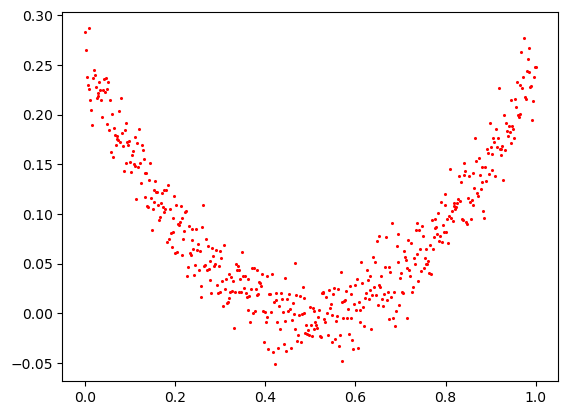

In [13]:
plt.scatter(X, y, s=1.5, c='red')

In [14]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X[..., None], y[..., None])

DecisionTreeRegressor(max_depth=2)

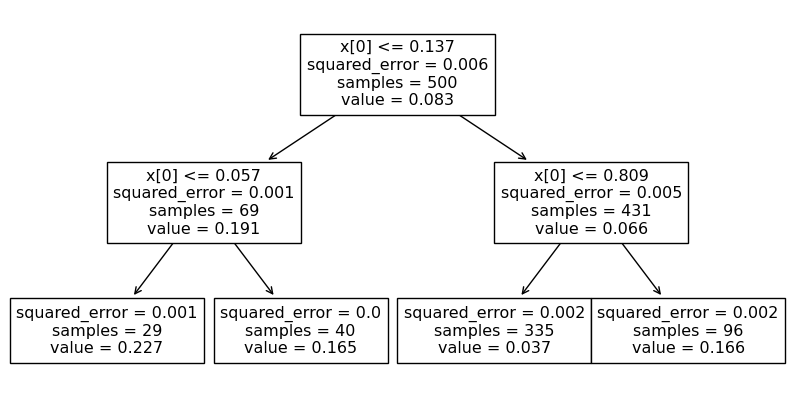

In [15]:
plt.figure(figsize=(10, 5))
plot_tree(tree_reg)
plt.show();

This tree looks very similar to the classification tree we built earlier. The main difference is that instead of predicting a class in eahc node we predict a value. For example if we want to make a prediction for a new instance $x_1 = 0.6$. We traverse the tree ultimately reaching the leaf node that gives us a value of 0.037. This prediction is the average target value of all the 335 samples that are present in the node having a squared error of 0.002, over those 335 samples.

The models predictions are represented on the left in the diagram below. If you set the max_depth = 3, then you get the predictions on the right. The predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to the predicted value.

<center>
<br>
<img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/regression_trees.png" height="300">
<br>
</center>

The CART algorithm works in almost the same way as earlier, except that instead of splitting the traning dataset in a way that minimises impurity, it now splits the training set in a way that minimises the MSE. Equation below shows the cost function that the algorithm tries to minimise.

Equation CART cost function for regression:

$J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$

where,

$MSE_{node} = \sum \limits_{i \in node}(\hat{y}_{node} - y^{(i)})^2$
$hat{y}_{node} = \frac{1}{m_{node}}\sum \limits_{i \in node}y^{(i)}$

Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression. Without any regularisation, the model tends to stick to close to the training data, this can be seen in the diagram given below, with regularisation however it follows the trend more and can generalise better.

<center>
<br>
<img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/regularizing_trees.png" height="300">
<br>
</center>

## 9. Instability

Decision Trees are very advantageous, they are for example simple, easy to understand and interpret because we can actually follow the pattern using the plot tree method, unlike other models like RandomForests as stated earlier. They are also versatile and powerful being able to perform both classification and regression tasks.

There are however some limitations to Decision Trees and they are as follows: 
1. Decision trees tend to have a very orthogonal decision boundaries, that is all the splits are made in a way that is perpendicular to the axis. This is can be a problem when the decision tree is trained on data that is rotated. This results in the decision trees decision boundary becoming unnecessarily convoluted. It might still fit well but it wont be as good at generalising. One way to limit the chances of this happening is using Principal Component Analysis, which is discussed in the section on Dimensionality Reduction.
2. Decision Trees are very senesitive to small variations in data, if we remove the widest Iris versicolor from the iris training set (with petals 4.8 cm long and 1.8 cm wide), the result is a very different decision tree. Since the training algorithm used by sklearn is stochastic (in the sense that it randomly selects the set of features to evaluate at each node), you will get very different models even on the same training data (unless you set the random_state hyperparameter which is used to reproduce the same model). Random Forests can limit this instability by averaging predictions over many trees.

## 10. Exercises

1. Train and fine-tune a Decision Tree for the moons dataset by following the given steps: -
* Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
* Use train_test_split to split the datatset into a training and test set
* Use grid search with cross validation with the help of GridSearchCv to find good hyperparameter values for our DecisionTreeClassifier (try using various values for the max_leaf_nodes hyperparameter)
* Train it on the full training set using these hyperparameters and measure the models accuracy on the test set. Try to get an accuracy goal of 85-87%

2. Grow a forest by following the given steps: -
* Continue the previous exercise, generate 1000 subsets of the training set, each containing 100 instances selected randomly. (Use sklearn ShuffleSplit class for this)
* Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise, Evaluate these 1000 Decision Trees on the test set. Since they were trained on smaller sets, they will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.
* For each test instance, generate the predictions of the 1000 Decision Trees and keep only the mosr frequent prediction (use SciPuy mode() function). This approach gives you majority vote predictions over the test set.
* Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than the first model (about 0.5 to 1.5% higher). This is your RandomForestClassifier!